In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv("obesity_child_age.csv")

In [4]:
data.shape

(99, 6)

In [5]:
data.tail()

,index,Time,Age,Gender,PercentObese,SE
94,94,"[2005,2006]","[12,19]",F,17.3,-2.1
95,95,"[2007,2008]","[12,19]",F,16.8,-2.0
96,96,"[2009,2010]","[12,19]",F,17.1,-1.3
97,97,"[2011,2012]","[12,19]",F,20.7,-2.0
98,98,"[2013,2014]","[12,19]",F,21.4,-3.2


In [6]:
data.columns

Index(['index', 'Time', 'Age', 'Gender', 'PercentObese', 'SE'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         99 non-null     int64  
 1   Time          99 non-null     object 
 2   Age           99 non-null     object 
 3   Gender        99 non-null     object 
 4   PercentObese  99 non-null     float64
 5   SE            99 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [8]:
data.isnull().sum()

index           0
Time            0
Age             0
Gender          0
PercentObese    0
SE              0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data1 = data

In [11]:
#delete index row
data1.drop('index', axis=1, inplace=True)

In [12]:
#separating Time into StartYear and EndYear
#separating Age into MinAge and MaxAge
from sklearn.preprocessing import StandardScaler
# data['Time'] = data['Time'].apply(lambda x: [int(year) for year in x.strip('[]').split(',')])
# data['StartYear'] = data['Time'].apply(lambda x: x[0])
# data['EndYear'] = data['Time'].apply(lambda x: x[1])
# data.drop('Time', axis=1, inplace=True)

data1['StartYear'] = data1['Time'].apply(lambda x: int(x.strip('[]').split(',')[0]))
data1['EndYear'] = data1['Time'].apply(lambda x: int(x.strip('[]').split(',')[1]))
data1.drop('Time', axis=1, inplace=True)

# 1. Convert string representations of age ranges to separate minimum and maximum ages
# Extract minimum and maximum ages from the list
data1.Age = data1.Age.str.strip('[]')
data1[['MinAge', 'MaxAge']] = data1['Age'].str.extract("(\d+),(\d+)", expand=True).astype(int)
data1.drop('Age', axis=1, inplace=True)

In [13]:
#get dummies for gender column
gender = pd.get_dummies(data1.Gender)
data1 = data1.join(gender)
data1.drop('Gender', axis=1, inplace=True)
data1 = data1.replace(to_replace = [True,False],value = ['1','0'])

In [14]:
data1

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.0,-0.6,1971,1974,2,5,1,0,0
1,5.0,-0.6,1976,1980,2,5,1,0,0
2,7.2,-0.7,1988,1994,2,5,1,0,0
3,10.3,-1.7,1999,2000,2,5,1,0,0
4,10.6,-1.8,2001,2002,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...
94,17.3,-2.1,2005,2006,12,19,0,1,0
95,16.8,-2.0,2007,2008,12,19,0,1,0
96,17.1,-1.3,2009,2010,12,19,0,1,0
97,20.7,-2.0,2011,2012,12,19,0,1,0


In [15]:
from ctgan import CTGAN

# initialize the CTGAN model
model = CTGAN()

# fit the model to the original data
model.fit(data1)

# generate synthetic data
synthetic_data = model.sample(len(data1))
synthetic_data1 = model.sample(len(data1))
synthetic_data2 = model.sample(len(data1))
synthetic_data3 = model.sample(len(data1))
synthetic_data4 = model.sample(len(data1))

# save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_data.csv', index=False)
synthetic_data1.to_csv('synthetic_data1.csv', index=False)
synthetic_data2.to_csv('synthetic_data2.csv', index=False)
synthetic_data3.to_csv('synthetic_data3.csv', index=False)
synthetic_data4.to_csv('synthetic_data4.csv', index=False)

In [16]:
synthetic_data.head()

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,13.031729,-2.085836,1985,2005,3,12,-0.042681,0.108128,-0.05274
1,13.027535,-2.304803,1998,2000,4,17,-0.144249,0.121893,0.012897
2,8.640120,-2.672343,1964,2004,0,4,0.11586,0.80245,-0.056888
3,13.286711,-0.802989,1970,1992,5,8,-0.14902,-0.102086,-0.150368
4,7.415683,-1.417472,2006,2007,6,11,0.110065,0.772156,-0.155093


In [17]:
data2 = pd.concat([data1,synthetic_data], ignore_index=True)
data2 = pd.concat([data2,synthetic_data1], ignore_index=True)
data2 = pd.concat([data2,synthetic_data2], ignore_index=True)
data2 = pd.concat([data2,synthetic_data3], ignore_index=True)
data2 = pd.concat([data2,synthetic_data4], ignore_index=True)

In [18]:
data2

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.000000,-0.600000,1971,1974,2,5,1,0,0
1,5.000000,-0.600000,1976,1980,2,5,1,0,0
2,7.200000,-0.700000,1988,1994,2,5,1,0,0
3,10.300000,-1.700000,1999,2000,2,5,1,0,0
4,10.600000,-1.800000,2001,2002,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...
589,13.993578,-1.617226,2014,1998,5,8,1.1676,0.165859,-0.161288
590,13.253465,-1.499448,1990,2003,2,19,-0.107955,0.05434,-0.099486
591,5.786037,-1.109681,1991,1994,8,9,0.548591,1.021984,-0.072562
592,14.953436,-3.159436,1990,1989,14,16,-0.192078,1.251274,-0.082418


In [19]:
data2.to_csv('data2.csv', index=False)

<Axes: >

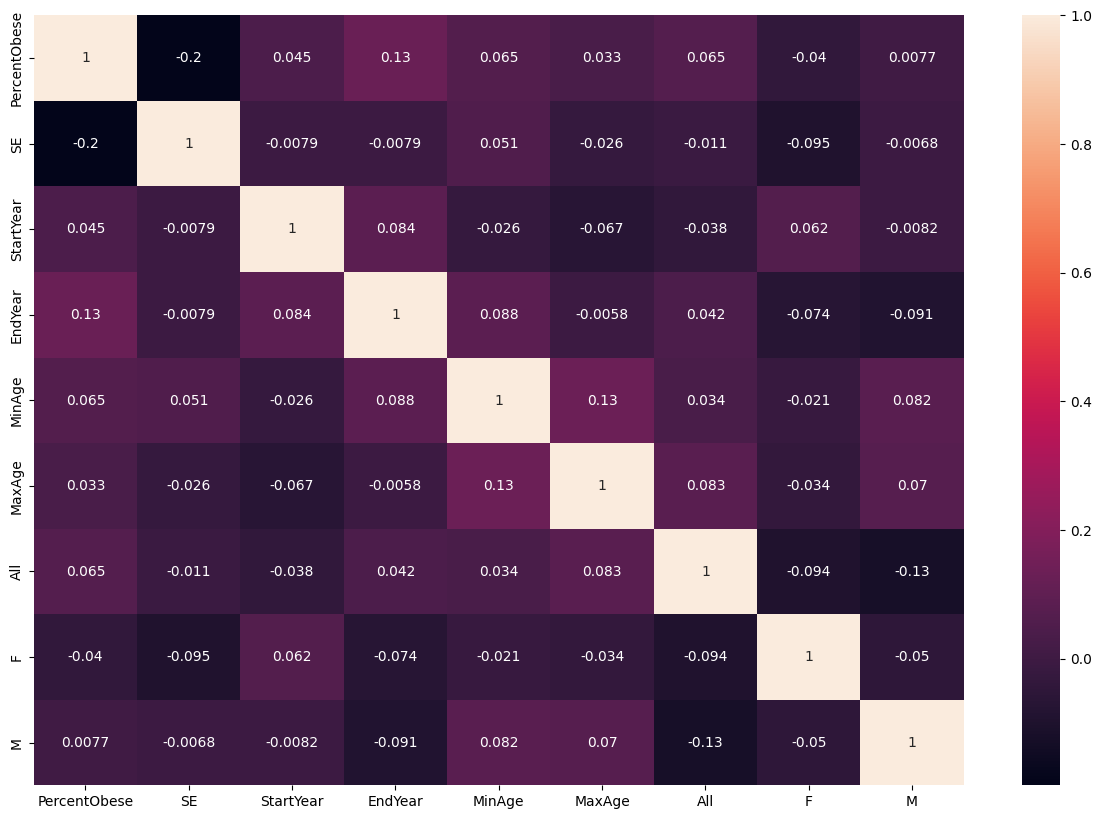

In [20]:
#correlation map
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(), annot = True)

In [21]:
# 3. Standardize the continuous-valued features 'Age' and 'PercentObese'
continuous_features = ['PercentObese', 'MinAge', 'MaxAge']
scaler = StandardScaler()
data2[continuous_features] = scaler.fit_transform(data2[continuous_features])

In [22]:
from sklearn.model_selection import train_test_split

X=data2.drop(['PercentObese','SE'],axis=1)
Y=data2['PercentObese']


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
train_data = X_train.join(Y_train)
train_data

,StartYear,EndYear,MinAge,MaxAge,All,F,M,PercentObese
239,1994,1986,-0.846553,-0.540600,-0.040629,0.039576,-0.061567,-1.226219
273,1976,1952,-1.565599,1.357456,0.018826,0.052075,-0.077708,1.650355
90,1988,1994,1.550266,1.530007,0,1,0,-0.411314
47,1999,2000,0.112174,0.149602,0,0,1,0.679083
560,2008,2012,-0.606871,-1.403353,-0.182971,-0.209193,0.151052,0.173747
...,...,...,...,...,...,...,...,...
211,2004,1991,-0.127508,-0.540600,0.059225,-0.033681,1.087485,-0.239500
566,1995,2013,0.351856,1.530007,0.01523,0.006316,-0.106063,0.243854
137,1998,1961,0.591538,0.149602,0.155537,-0.073704,1.040581,-0.382617
75,2011,2012,-0.846553,-0.885702,0,1,0,-0.858198


array([[<Axes: title={'center': 'StartYear'}>,
        <Axes: title={'center': 'EndYear'}>],
       [<Axes: title={'center': 'MinAge'}>,
        <Axes: title={'center': 'MaxAge'}>],
       [<Axes: title={'center': 'PercentObese'}>, <Axes: >]], dtype=object)

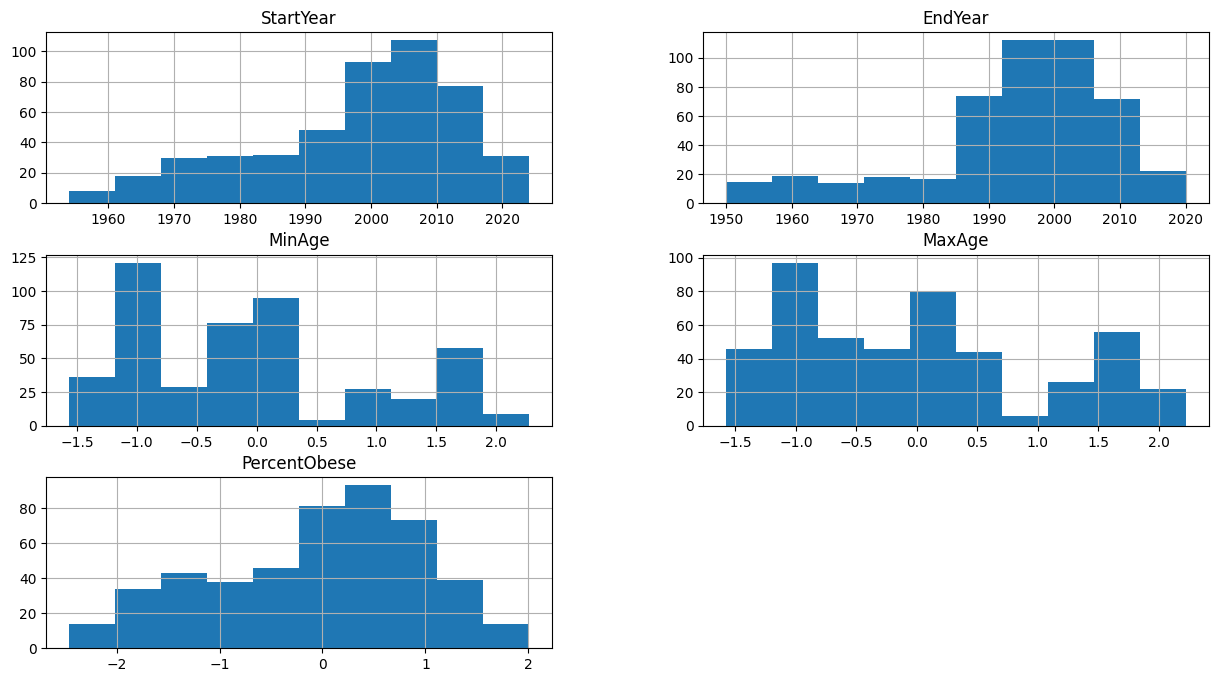

In [24]:
train_data.hist(figsize=(15,8))